In [8]:
import pandas as pd 
import numpy as np

# 导入数据

In [9]:
# 导入查看
tea = pd.read_csv('../data/tea.csv')
comment = pd.read_csv('../data/comment.csv')
display(tea.head(3))
display(comment.head(3))

,标题,评分,品牌,产地,茶类,详情链接,id,荐指数,总评,茶语排行,茶语分类排行,综合评分排行,热搜排行
0,[孝文家茶]牛肉（2015）,9.4,孝文家茶,福建,乌龙>其他,https://chaping.chayu.com/tea/2023,2023,4,一款火工细腻，霸气中又不失轻柔的大师级牛栏坑肉桂。\r\n正岩核心区域选料，由首批国家级武夷...,4,1,8,4
1,[华祥苑]宫廷清香安溪铁观音,9.4,华祥苑,福建,乌龙>安溪铁观音,https://chaping.chayu.com/tea/1002,1002,4,干茶：,4,1,432,8
2,[斗记茶业]金斗（2008）,9.3,斗记茶业,云南,普洱>生茶,https://chaping.chayu.com/tea/1298,1298,4,一款已经有明显转化的生普，时间已经带给这款茶明显不同于新茶的香气与滋味的表现。\r\n香气明...,13,4,119,15


,id,评论人,评论人等级,评分,评论内容,评论时间
0,1292,萧力争,专家,9.3,这款茶优点是原料级别高、芽叶肥壮显毫。***松紧合适，香气浓郁且带有良好的花香、滋味浓厚较爽...,2015-11-24
1,1292,木茗而来,达人,8.8,干茶芽头肥壮，带白毫，带有淡淡的果香。茶汤金黄透亮，滋味浓、爽滑鲜甜，香气带有花蜜香，滋味浓...,2015-11-17
2,1292,福的,NaN,9.4,斗记的这款金斗是一款有口皆碑好茶。几乎没有缺点。饮后心情愉悦且回味无穷。真是好茶自己会说话。,2018-10-11


In [10]:
# 信息查看
display(tea.info())
display(comment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   标题      4314 non-null   object 
 1   评分      4314 non-null   float64
 2   品牌      4305 non-null   object 
 3   产地      4314 non-null   object 
 4   茶类      4314 non-null   object 
 5   详情链接    4314 non-null   object 
 6   id      4314 non-null   int64  
 7   荐指数     4314 non-null   int64  
 8   总评      4314 non-null   object 
 9   茶语排行    4314 non-null   int64  
 10  茶语分类排行  4314 non-null   int64  
 11  综合评分排行  4314 non-null   int64  
 12  热搜排行    4314 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 438.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      24889 non-null  int64  
 1   评论人     24889 non-null  object 
 2   评论人等级   4801 non-null   object 
 3   评分      24889 non-null  float64
 4   评论内容    24882 non-null  object 
 5   评论时间    24889 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


None

# 标题词云

In [11]:
'''
标题由品牌与名称组成，值保留标题部分
'''
title = tea[['标题']]
def title_clean(s):
    try: # 剔除品牌
        s = s.split(']')[1]
    except:
        s = s.split(']')[0]
    finally: # 剔除数字
        s = s.split('（')[0]
    return s
title['标题'] = title['标题'].map(title_clean)
title

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,标题
0,牛肉
1,宫廷清香安溪铁观音
2,金斗
3,牛肉
4,茉莉银针
...,...
4309,花语茗韵清香铁观音
4310,铁观音
4311,RAN WATTE
4312,丰园阁浓香特级铁观音


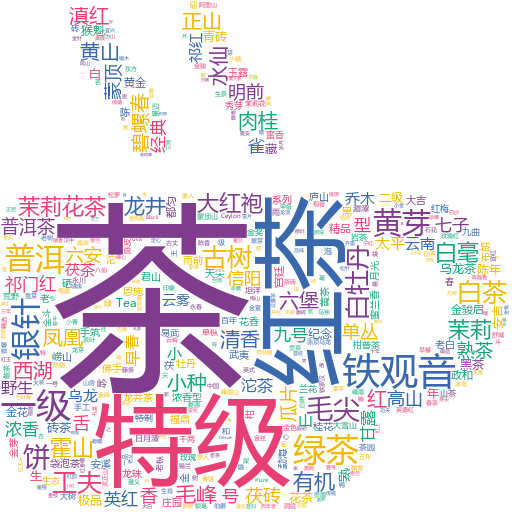

In [43]:
'''
词云图
'''
import jieba
txt = ''.join(list(title['标题']))
word = jieba.lcut(txt)
text = ' '.join(word)

from IPython.display import Image 
import stylecloud


stylecloud.gen_stylecloud(
    text=text,
    collocations=False,
    font_path=r'‪C:\Windows\Fonts\msyh.ttc',
    icon_name='fas fa-mug-hot',
    
    output_name='../output/标题词云图.png'
)
 
Image(filename='../output/标题词云图.png')

# 评分分布直方图

In [15]:
'''
评分取值 0-10
分区间 (0,2] (2,4] (4,6] (6,8] (8,10]
'''
score = tea[['评分']]
score = pd.cut(score['评分'],bins=[0,2,4,6,8,10]).reset_index()
score = score['评分'].value_counts().reset_index()
score = score.sort_values(by='index')
score['index'] = score['index'].map(lambda x: str(x))
score

,index,评分
4,"(0, 2]",1
3,"(2, 4]",2
2,"(4, 6]",40
1,"(6, 8]",1123
0,"(8, 10]",3148


In [16]:
'''
直方图
'''
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from pyecharts.globals import ThemeType

c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add_xaxis(list(score['index']))
    .add_yaxis("数量", list(score['评分']), category_gap=0, color=Faker.rand_color())
    .set_global_opts(title_opts=opts.TitleOpts(title="评分分布"))
)

c.render('../output/评分分布.html')
c.render_notebook()

# 品牌词云

In [17]:
'''
计算各个品牌数
'''
brand = tea[['品牌']]
brand = brand['品牌'].value_counts().reset_index()
word = list(brand['index'])
counts = list(brand['品牌'])
data = list(zip(word,counts))
data

[('斗记茶业', 92),
 ('中茶', 66),
 ('大益', 61),
 ('祥源茶', 31),
 ('伯韵', 29),
 ('陈升号', 27),
 ('峨眉雪芽', 27),
 ('龙润', 27),
 ('下关沱茶', 24),
 ('品品香', 24),
 ('澜沧古茶', 23),
 ('白沙溪', 21),
 ('老同志', 21),
 ('老台湾', 20),
 ('岁月知味', 20),
 ('泾渭茯茶', 19),
 ('凤牌', 19),
 ('吉普号', 19),
 ('武夷星', 18),
 ('八马', 18),
 ('勐库戎氏', 18),
 ('天福茗茶', 17),
 ('佤山映象', 17),
 ('孝文家茶', 16),
 ('竹叶青', 16),
 ('鹏龙', 16),
 ('吴裕泰', 16),
 ('兰馨', 15),
 ('味独珍', 15),
 ('宝和祥', 15),
 ('君山', 15),
 ('华祥苑', 15),
 ('徽六', 14),
 ('碧螺', 13),
 ('八角亭', 13),
 ('艺福堂', 13),
 ('琪明', 13),
 ('张一元', 13),
 ('Tea Tang', 13),
 ('Dilmah', 12),
 ('茶小隐', 12),
 ('茂圣', 12),
 ('卢正浩', 12),
 ('中吉号', 12),
 ('七彩云南', 11),
 ('日春', 11),
 ('海堤', 11),
 ('千回', 10),
 ('红灵茶叶', 10),
 ('湘益', 10),
 ('白韵', 10),
 ('赵李桥', 10),
 ('津乔', 10),
 ('蒙顿', 10),
 ('象棋山', 10),
 ('新益号', 10),
 ('谢裕大', 10),
 ('天方', 10),
 ('绿雪芽', 10),
 ('川茶集团', 10),
 ('迎客松', 10),
 ('王德传', 10),
 ('怡清源', 10),
 ('重茶集团', 10),
 ('MlesnA', 10),
 ('荔花村', 9),
 ('金帆牌', 9),
 ('柏联', 9),
 ('天毫', 9),
 ('徽将军', 9),
 ('AHMAD', 9),
 ('三父子',

In [18]:
'''
词云图
'''
import pyecharts.options as opts
from pyecharts.charts import WordCloud


c = (
    WordCloud(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add(series_name="品牌词云", data_pair=data, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="品牌词云", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
)
c.render('../output/品牌词云.html')
c.render_notebook()

# 产地热力地图

In [19]:
'''
计算每个产地产了多少种茶 
'''
place = tea[['产地']]
place = place['产地'].value_counts().reset_index()
place

,index,产地
0,云南,1132
1,福建,944
2,安徽,329
3,四川,321
4,广东,228
5,湖南,221
6,浙江,205
7,广西,163
8,国外,151
9,台湾,99


In [20]:
'''
热力地图 
'''
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

pieces = [
    {"min": 0, "max": 80},
    {"min": 80, "max": 160},
    {"min": 160, "max": 240},
    {"min": 240, "max": 320},
    {"min": 320, "max": 400},
    {"min": 400}
]

c = (
    Map(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add("", [list(z) for z in zip(list(place['index']), list(place['产地']))], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="产地地区分布"),
        visualmap_opts=opts.VisualMapOpts(max_=400,
                                          is_piecewise=True,
                                         pieces=pieces),
    )
)
c.render('../output/产地地区分布.html')
c.render_notebook()

# 每一种茶类有多少品种

In [21]:
'''
茶类字段有分一级，二级，以 > 隔开
计算每个一级品种有多少二级品种
'''
kind = tea[['茶类']]
kind['一级'] = kind['茶类'].map(lambda x: x.split('>')[0])
kind = kind['一级'].value_counts().reset_index()
kind

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,一级
0,普洱,906
1,绿茶,836
2,红茶,778
3,乌龙,634
4,黑茶,329
5,白茶,284
6,花茶,210
7,黄茶,170
8,袋泡,141
9,速溶茶,26


In [22]:
'''
柱状图
'''
from pyecharts import options as opts
from pyecharts.charts import Bar


c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add_xaxis(list(kind['index']))
    .add_yaxis("", list(kind['一级']))
    .set_global_opts(title_opts=opts.TitleOpts(title="茶类分布"))
)
c.render('../output/茶类分布.html')
c.render_notebook()

# 热搜前10茶

In [23]:
'''
清洗标题，并按热搜升序排序选出前20
'''
resou = tea[['标题','评分','品牌','产地','茶类','热搜排行']]
resou['标题'] = resou['标题'].map(title_clean)
resou = resou.sort_values(by='热搜排行')
resou = resou.iloc[:10,:]
resou

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,标题,评分,品牌,产地,茶类,热搜排行
2004,经典普洱,8.4,大益,云南,袋泡>熟茶,1
31,越乡龙井 特级,9.6,剡茗茶业社,浙江,绿茶,2
35,冻顶乌龙,9.4,王德传,台湾,乌龙>其他,3
0,牛肉,9.4,孝文家茶,福建,乌龙>其他,4
39,雨前特级南京雨花茶,9.4,强氏茗茶,江苏,绿茶>其他,5
34,白牡丹,9.4,二三两,福建,白茶>白牡丹,6
33,牛首,9.4,孝文家茶,福建,乌龙>其他,7
1,宫廷清香安溪铁观音,9.4,华祥苑,福建,乌龙>安溪铁观音,8
32,金色庄园系列·伍·祁红工夫,9.5,祥源茶,安徽,红茶>祁门红茶,9
51,1587臻茗,9.2,龙王山,浙江,绿茶>安吉白茶,10


In [24]:
'''
条形图 
'''
from pyecharts.components import Table
from pyecharts.options import ComponentTitleOpts


table = Table()

headers = ['标题','评分','品牌','产地','茶类','热搜排行']
rows = np.array(resou)
rows = rows.tolist()
table.add(headers, rows)
table.set_global_opts(
    title_opts=ComponentTitleOpts(title="热搜前10")
)
table.render("../output/热搜前20.html")
table.render_notebook()

标题,评分,品牌,产地,茶类,热搜排行
经典普洱,8.4,大益,云南,袋泡>熟茶,1
越乡龙井 特级,9.6,剡茗茶业社,浙江,绿茶,2
冻顶乌龙,9.4,王德传,台湾,乌龙>其他,3
牛肉,9.4,孝文家茶,福建,乌龙>其他,4
雨前特级南京雨花茶,9.4,强氏茗茶,江苏,绿茶>其他,5
白牡丹,9.4,二三两,福建,白茶>白牡丹,6
牛首,9.4,孝文家茶,福建,乌龙>其他,7
宫廷清香安溪铁观音,9.4,华祥苑,福建,乌龙>安溪铁观音,8
金色庄园系列·伍·祁红工夫,9.5,祥源茶,安徽,红茶>祁门红茶,9
1587臻茗,9.2,龙王山,浙江,绿茶>安吉白茶,10


# 评论时间走势图

In [25]:
'''
计算维度为年月，每一年每一月的评论数走势
比较每一年的走势
14-20年
'''
comm_time = comment[['评论时间']]
comm_time['year'] = comm_time['评论时间'].map(lambda x: x.split('-')[0])
comm_time['month'] = comm_time['评论时间'].map(lambda x: x.split('-')[1])

_14 = comm_time[comm_time['year'] == '2014']['month'].value_counts().reset_index()
_14 = _14.sort_values(by='index')

_15 = comm_time[comm_time['year'] == '2015']['month'].value_counts().reset_index()
_15 = _15.sort_values(by='index')

_16 = comm_time[comm_time['year'] == '2016']['month'].value_counts().reset_index()
_16 = _16.sort_values(by='index')

_17 = comm_time[comm_time['year'] == '2017']['month'].value_counts().reset_index()
_17 = _17.sort_values(by='index')

_18 = comm_time[comm_time['year'] == '2018']['month'].value_counts().reset_index()
_18 = _18.sort_values(by='index')

_19 = comm_time[comm_time['year'] == '2019']['month'].value_counts().reset_index()
_19 = _19.sort_values(by='index')

_20 = comm_time[comm_time['year'] == '2020']['month'].value_counts().reset_index()
_20 = _20.sort_values(by='index')

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
'''
折线图
'''
import pyecharts.options as opts
from pyecharts.charts import Line 

x_data = ['1','2','3','4','5','6','7','8','9','10','11','12']


c = (
    Line()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="2014",
        #stack="总量",
        y_axis=list(_14['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2015",
        #stack="总量",
        y_axis=list(_15['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2016",
        #stack="总量",
        y_axis=list(_16['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2017",
        #stack="总量",
        y_axis=list(_17['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2018",
        #stack="总量",
        y_axis=list(_18['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2019",
        #stack="总量",
        y_axis=list(_19['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2020",
        #stack="总量",
        y_axis=list(_20['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评论走势"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
)
c.render('../output/每一年评论走势.html')
c.render_notebook()

# 总评聚类

In [27]:
'''
总评聚类，把相似的聚在一起
使用 textRank 算法提取每种茶总评的关键词
文本向量化，计算余弦相似度 
最后进行聚类
对每个聚类结果绘制词云
'''
zongping = tea[['总评']]


# textRank 算法
from jieba import analyse

def textrank_extract(text, keyword_num=10):
    textrank = analyse.textrank
    keywords = textrank(text, keyword_num)
    # 输出抽取出的关键词
    kw = ''
    for keyword in keywords:
        kw += keyword + ' '
    return kw

zongping['keyword'] = zongping['总评'].map(textrank_extract)
zongping

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,总评,keyword
0,一款火工细腻，霸气中又不失轻柔的大师级牛栏坑肉桂。\r\n正岩核心区域选料，由首批国家级武夷...,肉桂 入口 带来 山场 遗传 焙火 茶汤 霸气 全部 桂皮
1,干茶：,
2,一款已经有明显转化的生普，时间已经带给这款茶明显不同于新茶的香气与滋味的表现。\r\n香气明...,滋味 香气 新茶 生普 时间 生动 为主 留香 极具 变化
3,一款内质丰厚、完美呈现的顶级山场肉桂\r\n精湛的工艺和顶级的选料，激发出武夷岩茶最深层次的...,香气 茶汤 乐曲 停止 顶级 花果 变化 满足 统一 激发
4,苛刻的选料和精湛的工艺让一款茉莉花茶得到了升华。\r\n清雅甜果香、清幽花香与茶本身的嫩香，...,工艺 遇见 带来 茶汤 茉莉花 绽放 相融 交织 茉莉花茶 得到
...,...,...
4309,干茶：有非茶类夹杂物。；汤色：无异味，有清纯兰香。；气味：欠纯，微,茶类 夹杂
4310,干茶：稍卷曲，不,
4311,干茶：夹杂绿叶，部分干茶不成形，整碎净度差，干茶外形存在明显缺陷。汤色：汤色金黄，茶汤浑浊。...,滋味 部分 缺陷 整碎 茶汤 绿叶 存在 净度 气味 夹杂
4312,干茶：螺钉状，条索尚紧，墨绿色、黄绿，颜色花杂，色泽较暗，欠匀齐，不符合浓香,颜色 螺钉 符合 花杂 条索 浓香 色泽


In [28]:
# 文本向量化，计算余弦相似度
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vect = CountVectorizer()
X = vect.fit_transform(list(zongping['keyword']))  # 将关键词的内容文本向量化
X = X.toarray()

words_bag2 = vect.get_feature_names()  
df = pd.DataFrame(X, columns=words_bag2)
cosine_similarities  = cosine_similarity(df)

cosine_similarities

array([[1. , 0. , 0. , ..., 0.1, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0.1, 0. , 0. ],
       ...,
       [0.1, 0. , 0.1, ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [29]:
# 聚类
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2, random_state=123)
k_data = kms.fit_predict(cosine_similarities)
zongping['flag'] = k_data
zongping

D:\programming\dev_env\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,总评,keyword,flag
0,一款火工细腻，霸气中又不失轻柔的大师级牛栏坑肉桂。\r\n正岩核心区域选料，由首批国家级武夷...,肉桂 入口 带来 山场 遗传 焙火 茶汤 霸气 全部 桂皮,1
1,干茶：,,1
2,一款已经有明显转化的生普，时间已经带给这款茶明显不同于新茶的香气与滋味的表现。\r\n香气明...,滋味 香气 新茶 生普 时间 生动 为主 留香 极具 变化,0
3,一款内质丰厚、完美呈现的顶级山场肉桂\r\n精湛的工艺和顶级的选料，激发出武夷岩茶最深层次的...,香气 茶汤 乐曲 停止 顶级 花果 变化 满足 统一 激发,0
4,苛刻的选料和精湛的工艺让一款茉莉花茶得到了升华。\r\n清雅甜果香、清幽花香与茶本身的嫩香，...,工艺 遇见 带来 茶汤 茉莉花 绽放 相融 交织 茉莉花茶 得到,1
...,...,...,...
4309,干茶：有非茶类夹杂物。；汤色：无异味，有清纯兰香。；气味：欠纯，微,茶类 夹杂,1
4310,干茶：稍卷曲，不,,1
4311,干茶：夹杂绿叶，部分干茶不成形，整碎净度差，干茶外形存在明显缺陷。汤色：汤色金黄，茶汤浑浊。...,滋味 部分 缺陷 整碎 茶汤 绿叶 存在 净度 气味 夹杂,0
4312,干茶：螺钉状，条索尚紧，墨绿色、黄绿，颜色花杂，色泽较暗，欠匀齐，不符合浓香,颜色 螺钉 符合 花杂 条索 浓香 色泽,1


In [42]:
# 绘制词云
from pyecharts.globals import SymbolType
from collections import Counter
pd.set_option('display.max_rows',None)

for i in range(2):
    t = '种类' + str(i+1)
    data = list(zongping[zongping['flag'] == i]['keyword'])
    data = list(dict(Counter(' '.join(data).split())).items())
    data = sorted(data,key=lambda x: x[1],reverse=True)[:250]
    c = (
        WordCloud(init_opts=opts.InitOpts(theme=ThemeType.ROMANTIC))
        .add(series_name=t, data_pair=data,
             word_size_range=[6, 66],shape=SymbolType.DIAMOND)
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=t, title_textstyle_opts=opts.TextStyleOpts(font_size=23)
            ),
            tooltip_opts=opts.TooltipOpts(is_show=True),
        )
    )
    display(c.render_notebook())

# 评论关键词提取

In [32]:
'''
分词，词性标注，去除停用词
'''
comm = comment[['评论内容']]

import jieba
import jieba.posseg as psg

# 把每条评论分词，并标注每个词的词性
worker = lambda s: [(x.word,x.flag) for x in psg.cut(str(s))] # 自定义简单分词函数
seg_word = comm['评论内容'].apply(worker)
seg_word.head()

0    [(这, r), (款, n), (茶, n), (优点, n), (是, v), (原料,...
1    [(干茶芽, nr), (头, n), (肥壮, a), (，, x), (带白, v), ...
2    [(斗记, n), (的, uj), (这款, r), (金斗, nr), (是, v), ...
3    [(茶汤, n), (为, p), (非常, d), (漂亮, a), (的, uj), (...
4    [(汤水, nr), (中, f), (的, uj), (蜜香, n), (同样, d), ...
Name: 评论内容, dtype: object

In [33]:
# 提取名词，形容词，删除停用词
stop_word_path = '../data/stopword.txt'
stopword_list = [sw.replace('\n', '') for sw in open(stop_word_path,encoding='utf-8').readlines()]
comm = list(seg_word.values)
new_comm = []
for cm in comm:
    t = ''
    for c in cm:
        if (c[1] == 'n' or c[1] == 'adj') and (c[0] not in stopword_list):
            t += c[0] + ' '
    new_comm.append(t.strip())
new_comm

['款 茶 优点 原料 级别 芽叶 香气 滋味 缺点 叶 总体 款 品质 普洱茶',
 '头 果香 茶汤 滋味 香气 花蜜 滋味 化 茶质',
 '斗记 茶 缺点 心情 茶',
 '茶汤 金黄色 亮度高',
 '蜜香 化 消失',
 '茶汤 金黄色 亮度高',
 '蜜香 化 消失',
 '甜润 蜜香',
 '金色',
 '斗记 玉金 级别 茶 地方 记 普洱茶 基本特征 茶汤 体验 滋味',
 '茶汤 滋味 香气 口感 冲泡 泡茶 汤 茶 冲泡',
 '茶 工艺 原料 选料 空间',
 '茶 香气 甜度 喉韵 口感 尾韵 茶',
 '茶汤 滋味 力度 香气 杂 痕迹',
 '紫砂壶 冲泡 水温 干茶 有果 蜜香 叶片 茶汤 涩味 甜香 两颊 泡 滋味 口感 香气 汤质 茶汤 香气 口 甜度',
 '香气 滋味 感染力 口腔 内',
 '香气 滋味',
 '香气 滋味',
 '味道 有点 涩味 儿 泡茶 汤 颜色 耐泡 茶 香气',
 '感觉 茶叶 香气',
 '干茶 油润 色泽 青褐 芽叶 芽 头 香气 茶汤 滋味 协调性 柔水 甜 油润 光泽',
 '前段时间 茶 生津 汤色 口感',
 '口感 茶叶 滋味 香气 高长',
 '款 茶 优点 原料 级别 茶芽 香气 滋味 缺点 总体 款 原料 品质 普洱茶',
 '活力 茶 香气 甜味 水 香味 果香 方向 甜香 冲击力 十泡 甜味 感觉',
 '茶 果 香气 饼面 叶片 黑褐 油润 芽头 全部 金色 茶汤 亮度高 茶汤 滋味 产生 整体 花蜜 喉咙 口感 滋味 口腔 整体 香气 滋味',
 '香气 蜜香 果香 口齿',
 '斗记 茶气 口感 蜜甜 韵感 茶 个人 茶汤 缺点 韵味 口腔 层层 铺展开 感觉 缺点 茶',
 '茶汤 香气 口腔 杂',
 '茶气 蜜 甜香 花果 润喉',
 '干茶 条索 有金 茶汤 油亮 香气 茶汤 清润',
 '斗记 香气 滋味 感觉 舒适度 体验',
 '茶汤 金色 亮度高 香气 花蜜',
 '茶 香气 甜味',
 '茶 甜香 人 苦味 状态 茶 香气 感觉',
 '迷人 杯底 滋味 天地',
 '茶 黑褐 油润 芽头 香气 花蜜 茶汤 茶汤 滋味',
 '茶汤 稠油 口感 香气 果香',
 '款 茶 优点 原料 茶 缺点 总体 款 茶 外形 内质 香气 初闻',
 '亮度高 香

## TF_IDF 算法

In [34]:
import math
import functools

# idf值统计方法
def train_idf(doc_list):
    '''
    训练数据集生成对应的 IDF 值字典
    :param doc_list:
    :return:
    '''
    idf_dic = {}
    # 总文档数，可以理解为几个文档，或者几条评论等
    tt_count = len(doc_list)

    # 每个词出现的文档数
    for doc in doc_list:
        for word in doc.split():
            idf_dic[word] = idf_dic.get(word, 0.0) + 1.0

    # 按公式转换为idf值，分母加1进行平滑处理
    for k, v in idf_dic.items():
        idf_dic[k] = math.log(tt_count / (1.0 + v))

    # 对于没有在字典中的词，默认其仅在一个文档出现，得到默认idf值
    default_idf = math.log(tt_count / (1.0))
    return idf_dic, default_idf


# TF-IDF类
class TfIdf(object):
    # 四个参数分别是：训练好的idf字典，默认idf值，处理后的待提取文本，关键词数量
    def __init__(self, idf_dic, default_idf, word_list, keyword_num):
        self.word_list = word_list
        self.idf_dic, self.default_idf = idf_dic, default_idf
        self.tf_dic = self.get_tf_dic()
        self.keyword_num = keyword_num

    # 统计tf值
    def get_tf_dic(self):
        tf_dic = {}
        for word in self.word_list:
            tf_dic[word] = tf_dic.get(word, 0.0) + 1.0

        tt_count = len(self.word_list)
        for k, v in tf_dic.items():
            tf_dic[k] = float(v) / tt_count

        return tf_dic

    # 按公式计算tf-idf
    def get_tfidf(self):
        tfidf_dic = {}
        for word in self.word_list:
            idf = self.idf_dic.get(word, self.default_idf)
            tf = self.tf_dic.get(word, 0)

            tfidf = tf * idf
            tfidf_dic[word] = tfidf

        tfidf_dic.items()
        # 根据tf-idf排序，去排名前keyword_num的词作为关键词
        for k, v in sorted(tfidf_dic.items(), key=functools.cmp_to_key(cmp), reverse=True)[:self.keyword_num]:
            print(k + "/ ", end='')
        print()


#  排序函数，用于topK关键词的按值排序，得分相同，再根据关键词排序
def cmp(e1, e2):
    res = np.sign(e1[1] - e2[1])
    if res != 0:
        return res
    else:
        a = e1[0] + e2[0]
        b = e2[0] + e1[0]
        if a > b:
            return 1
        elif a == b:
            return 0
        else:
            return -1

        
# 计算 idf 值
idf_dic, default_idf = train_idf(new_comm)
# 调用计算好的 idf 值计算 TF-IDF 值，选出排名靠前的词语
word_list = []
for c in new_comm:
    c = c.split()
    for i in c:
        word_list.append(i)
tfidf_model = TfIdf(idf_dic, default_idf, word_list, keyword_num=10)
tfidf_model.get_tfidf()

滋味/ 茶/ 茶汤/ 香气/ 口感/ 甜香/ 款/ 品质/ 外形/ 汤/ 


## LDA 主题模型

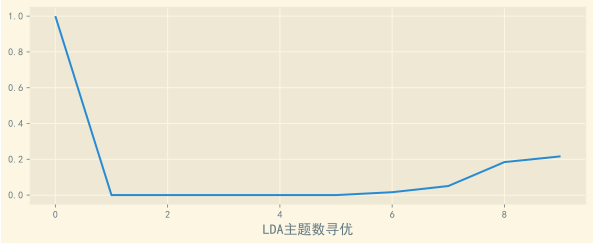

In [35]:
%matplotlib inline
import re
import itertools
import matplotlib
from gensim import corpora, models
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False # 解决负号无法正常显示的问题
%config InlineBackend.figure_format = 'svg' # 将图标设置成矢量图格式显示，会更清晰
plt.style.use('Solarize_Light2') # 设置绘图样式
#matplotlib.use('Qt5Agg')

# 建立词典,建立语料库
w_dict = corpora.Dictionary([[i] for i in word_list])
w_corpus = [w_dict.doc2bow(j) for j in [[i] for i in word_list]]  

# 寻找最优主题数
# 构造主题数寻优函数
def cos(vector1, vector2):  # 余弦相似度函数
    dot_product = 0.0;
    normA = 0.0;
    normB = 0.0;
    for a, b in zip(vector1, vector2):
        dot_product += a * b
        normA += a ** 2
        normB += b ** 2
    if normA == 0.0 or normB == 0.0:
        return (None)
    else:
        return (dot_product / ((normA * normB) ** 0.5))

    # 主题数寻优


def lda_k(x_corpus, x_dict):
    # 初始化平均余弦相似度
    mean_similarity = []
    mean_similarity.append(1)

    # 循环生成主题并计算主题间相似度
    for i in np.arange(2, 11):
        lda = models.LdaModel(x_corpus, num_topics=i, id2word=x_dict)  # LDA模型训练
        for j in np.arange(i):
            term = lda.show_topics(num_words=50)

        # 提取各主题词
        top_word = []
        for k in np.arange(i):
            top_word.append([''.join(re.findall('"(.*)"', i)) \
                             for i in term[k][1].split('+')])  # 列出所有词

        # 构造词频向量
        word = sum(top_word, [])  # 列出所有的词
        unique_word = set(word)  # 去除重复的词

        # 构造主题词列表，行表示主题号，列表示各主题词
        mat = []
        for j in np.arange(i):
            top_w = top_word[j]
            mat.append(tuple([top_w.count(k) for k in unique_word]))

        p = list(itertools.permutations(list(np.arange(i)), 2))
        l = len(p)
        top_similarity = [0]
        for w in np.arange(l):
            vector1 = mat[p[w][0]]
            vector2 = mat[p[w][1]]
            top_similarity.append(cos(vector1, vector2))

        # 计算平均余弦相似度
        mean_similarity.append(sum(top_similarity) / l)
    return (mean_similarity)

# 计算主题平均余弦相似度
w_k = lda_k(w_corpus, w_dict)

# 绘制主题平均余弦相似度图形
font = FontProperties(size=14)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax1.plot(w_k)
ax1.set_xlabel('LDA主题数寻优', fontproperties=font)

plt.show()

In [39]:
# LDA主题分析
lda = models.LdaModel(w_corpus, num_topics = 1, id2word = w_dict)
topic = lda.print_topics(num_words = 10)

theme = []
for p in topic:
    word = re.findall('\*"(.*?)"',p[1])
    theme.append(word)
theme

[['茶', '滋味', '香气', '茶汤', '口感', '品质', '外形', '款', '条索', '色泽']]